<a href="https://colab.research.google.com/github/xAn-x/Language-Modelling-Zero-to-One/blob/master/02_Multi_Layer_Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Understanding the Multilayer Perceptron (MLP) Model

A Multilayer Perceptron (MLP) is a type of artificial neural network used for various tasks like classification, regression, and more. It consists of multiple layers of neurons, which are interconnected and work together to learn patterns in data. Here's a simple explanation:

1. **Neurons and Layers**:
   - **Neurons**: Basic units that receive inputs, apply a transformation (usually a weighted sum), and pass the result through an activation function.
   - **Layers**: MLPs have an input layer, one or more hidden layers, and an output layer. Each layer consists of multiple neurons.

2. **Input Layer**:
   - This is the first layer of the network that takes the input data. Each neuron in this layer represents an input feature.

3. **Hidden Layers**:
   - These layers are in between the input and output layers. They perform computations and feature extraction.
   - Each neuron in a hidden layer takes inputs from all neurons in the previous layer, applies weights, sums them up, and passes the result through an activation function (like ReLU or sigmoid).

4. **Output Layer**:
   - This is the final layer that produces the output of the network. The number of neurons in this layer depends on the task (e.g., one neuron for binary classification, multiple neurons for multi-class classification).

5. **Weights and Biases**:
   - Each connection between neurons has a weight that adjusts as the network learns.
   - Each neuron has a bias term added to the weighted sum before applying the activation function.

6. **Activation Functions**:
   - Functions like ReLU (Rectified Linear Unit), sigmoid, or tanh are applied to the output of each neuron to introduce non-linearity. This allows the network to learn complex patterns.

7. **Forward Propagation**:
   - Data passes from the input layer through the hidden layers to the output layer. At each neuron, inputs are weighted, summed, and passed through an activation function.

8. **Backward Propagation**:
   - The network's output is compared to the actual target values using a loss function.
   - The error is propagated back through the network, and weights are adjusted using an optimization algorithm (like gradient descent) to minimize the error.

## `MLP => Using a Neural Net for language Modelling:`

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
!wget https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt

--2024-07-10 04:57:32--  https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1115394 (1.1M) [text/plain]
Saving to: ‘input.txt’

input.txt           100%[===================>]   1.06M  --.-KB/s    in 0.01s   

2024-07-10 04:57:32 (104 MB/s) - ‘input.txt’ saved [1115394/1115394]



In [3]:
with open('input.txt','r',encoding="utf-8") as f:
  text=f.read()

In [4]:
print(text[:300])

First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You are all resolved rather to die than to famish?

All:
Resolved. resolved.

First Citizen:
First, you know Caius Marcius is chief enemy to the people.

All:
We know't, we know't.

First Citizen:
Let us


In [5]:
vocab=sorted(list(set(text)))
vocab_size=len(vocab)

print(f"vocab size:{vocab_size}")
print(f"vocab :{vocab}")

vocab size:65
vocab :['\n', ' ', '!', '$', '&', "'", ',', '-', '.', '3', ':', ';', '?', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


In [6]:
stoi={ch:i for i,ch in enumerate(vocab)}
itos={i:ch for i,ch in enumerate(vocab)}

def encode(s:str):
  return [stoi[ch] for ch in s]

def decode(l:list):
  return "".join([itos[i] for i in l])

print(encode("Hello,World"))
print(decode(encode("Hello,World")))

[20, 43, 50, 50, 53, 6, 35, 53, 56, 50, 42]
Hello,World


In [7]:
data=torch.tensor(encode(text),dtype=torch.long)

train_pct=int(0.9*len(text))

train_data=data[:train_pct]
val_data=data[train_pct:]

print(f"train size:{train_data.shape}")
print(f"validation size:{val_data.shape}")

train size:torch.Size([1003854])
validation size:torch.Size([111540])


In [8]:
import torch.nn as nn

In [200]:
class MLP(nn.Module):
  def __init__(self,vocab_size,block_size,embedding_dim):
    super().__init__()

    self.vocab_size=vocab_size
    self.embedding_dim=embedding_dim
    self.block_size=block_size

    self.model=nn.Sequential(
        nn.Embedding(vocab_size,embedding_dim), # B,T,C
        nn.Flatten(), # B,T*

        nn.Linear(block_size*embedding_dim,64), # B,128
        nn.ReLU(),
        nn.BatchNorm1d(64),
        nn.Dropout(0.3),

        nn.Linear(64,128), # B,256
        nn.ReLU(),
        nn.BatchNorm1d(128),
        nn.Dropout(0.3),

        nn.Linear(128,256), # B,256
        nn.ReLU(),
        nn.BatchNorm1d(256),
        nn.Dropout(0.3),

        nn.Linear(256,256), # B,256
        nn.ReLU(),
        nn.BatchNorm1d(256),
        nn.Dropout(0.3),

        nn.Linear(256,vocab_size) # B,vocab_size
    )

  def forward(self,x,targets=None):
    logits=self.model(x)
    loss=None
    if targets is not None:
      loss=torch.nn.functional.cross_entropy(logits,targets)

    return logits,loss

In [201]:
batch_size=128
block_size=32
n_embedding=15

In [202]:
model=MLP(vocab_size,block_size,n_embedding)

model

MLP(
  (model): Sequential(
    (0): Embedding(65, 15)
    (1): Flatten(start_dim=1, end_dim=-1)
    (2): Linear(in_features=480, out_features=64, bias=True)
    (3): ReLU()
    (4): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): Dropout(p=0.3, inplace=False)
    (6): Linear(in_features=64, out_features=128, bias=True)
    (7): ReLU()
    (8): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): Dropout(p=0.3, inplace=False)
    (10): Linear(in_features=128, out_features=256, bias=True)
    (11): ReLU()
    (12): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (13): Dropout(p=0.3, inplace=False)
    (14): Linear(in_features=256, out_features=256, bias=True)
    (15): ReLU()
    (16): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (17): Dropout(p=0.3, inplace=False)
    (18): Linear(in_features=256, out_features=65, bias=True)
  )
)

In [203]:
no_of_parameters=sum([p.numel() for p in model.model.parameters()])
print(f"No. of parameters:{no_of_parameters}")

No. of parameters:157008


In [204]:
def get_batch(split: str):
    data = train_data if split == "train" else val_data

    x_batch = []
    y_batch = []

    start_idx = torch.randint(0, len(data) - batch_size - block_size, ())

    for i in range(batch_size):
        idx = start_idx + i

        x = data[idx:idx + block_size]
        y = data[idx + block_size]

        x_batch.append(x)
        y_batch.append(y)

    x = torch.stack(x_batch)
    y = torch.tensor(y_batch)  # Convert y_batch to tensor

    return x, y



In [205]:
x,y=get_batch("train")

In [206]:
x.shape,y.shape

(torch.Size([128, 32]), torch.Size([128]))

In [207]:
x[:5],y[:5]

(tensor([[58, 46, 43,  1, 56, 46, 43, 59, 51,  6,  0, 18, 53, 56,  1, 43, 52, 42,
          47, 52, 45,  1, 58, 46, 43, 43,  1, 52, 53,  1, 57, 53],
         [46, 43,  1, 56, 46, 43, 59, 51,  6,  0, 18, 53, 56,  1, 43, 52, 42, 47,
          52, 45,  1, 58, 46, 43, 43,  1, 52, 53,  1, 57, 53, 53],
         [43,  1, 56, 46, 43, 59, 51,  6,  0, 18, 53, 56,  1, 43, 52, 42, 47, 52,
          45,  1, 58, 46, 43, 43,  1, 52, 53,  1, 57, 53, 53, 52],
         [ 1, 56, 46, 43, 59, 51,  6,  0, 18, 53, 56,  1, 43, 52, 42, 47, 52, 45,
           1, 58, 46, 43, 43,  1, 52, 53,  1, 57, 53, 53, 52, 43],
         [56, 46, 43, 59, 51,  6,  0, 18, 53, 56,  1, 43, 52, 42, 47, 52, 45,  1,
          58, 46, 43, 43,  1, 52, 53,  1, 57, 53, 53, 52, 43, 56]]),
 tensor([53, 52, 43, 56,  8]))

In [208]:
logits,loss=model(x)

logits.shape

torch.Size([128, 65])

In [209]:
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')

device

device(type='cuda')

In [213]:
model.to(device)

MLP(
  (model): Sequential(
    (0): Embedding(65, 15)
    (1): Flatten(start_dim=1, end_dim=-1)
    (2): Linear(in_features=480, out_features=64, bias=True)
    (3): ReLU()
    (4): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): Dropout(p=0.3, inplace=False)
    (6): Linear(in_features=64, out_features=128, bias=True)
    (7): ReLU()
    (8): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): Dropout(p=0.3, inplace=False)
    (10): Linear(in_features=128, out_features=256, bias=True)
    (11): ReLU()
    (12): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (13): Dropout(p=0.3, inplace=False)
    (14): Linear(in_features=256, out_features=256, bias=True)
    (15): ReLU()
    (16): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (17): Dropout(p=0.3, inplace=False)
    (18): Linear(in_features=256, out_features=65, bias=True)
  )
)

In [214]:
import torch.optim as optim
from torch.optim.lr_scheduler import OneCycleLR

# Assuming `model` and `opt` are defined somewhere
opt = optim.Adam(model.parameters(), lr=4e-4)

In [215]:
@ torch.no_grad()
def generate(n_chars=500):
  si=torch.randint(len(train_data)-block_size-1,())
  ix=train_data[si:si+block_size].unsqueeze(0).to(device)
  chars=[]
  model.eval()

  for i in range(n_chars):
    logits,_=model(ix)
    probs=torch.softmax(logits,-1)
    i=torch.multinomial(probs,num_samples=1)[0]
    ix=torch.cat([ix[0,1:],i]).unsqueeze(0)
    chars.append(itos[i.item()])

  model.train()
  return "".join(chars)

In [217]:
# without training
print(generate(500))

XtD,Z;:qladtnrGXde.;oZ3PLpzmK UkOGInz!OXzW?zvCFNtN
D3:XoWOsFxHdjXGzLdF'DWbZxBv
xOV.bxq:B-nbWpMwXti
QP'ZC?QF3!A?M;rMLvnUbTcC$jN'jiTpuJG3AngZ,rwHKW 
d
HkLctp.wT?m
e!faEiJjDMmgUmyZJzYx!Xaoie& Bi'DfJjxDBKzWjGXQXjnAHMgXOEipOzJJ YGZhZkYRYLqr&.XfH3,Vz-IfkbQaoFJn'GlReq!FLXHo'zqi,?SJjlcE.kegaKVXa&bl3jOV&
T:bBWyy$
Z-zWTObQAfcVO
twUkZLrTFNKhuOcIt-VJjhZlSGqf-x-?CDPz&Vlgdo!lNsPBxonxg-f,k:ClaYuaSql UPHgd.dfs!hw!&;N3PSOzJ?xUNboCLceZezk$WDVOj.AZeUPbtxElgJty QNi?vqWWkHs$LE:c,T3,nZWZbTM3nq TPcyxKO&TDZChhf&;OwWjtl


In [218]:
def fit(model,epochs):
  # Calculate total number of steps (equivalent to epochs)
  total_steps = epochs * (len(train_data) // batch_size)
  # Define One Cycle LR scheduler
  scheduler = OneCycleLR(opt, max_lr=3e-3, total_steps=total_steps)


  history={"loss":[],"val_loss":[]}
  k=1000

  for epoch in range(epochs):
    model.train()
    x,y=get_batch("train")
    x,y=x.to(device),y.to(device)
    _,train_loss=model(x,y)


    opt.zero_grad()

    # Backward pass:
    train_loss.backward()

    # update paramaters
    opt.step()
    scheduler.step()

     # put model in evaluation phase
    model.eval()
    with torch.no_grad():
      x,y=get_batch("val")
      x,y=x.to(device),y.to(device)
      _,val_loss=model(x,y)


    if((epoch+1)%500==0):
      print(f"Train-loss:{train_loss:.4f}, Validation-loss:{val_loss:.4f}")


    history["loss"].append(train_loss.item())
    history["val_loss"].append(val_loss.item())

  return history

In [219]:
history=fit(model,7_000)

Train-loss:4.0396, Validation-loss:3.8805
Train-loss:3.4051, Validation-loss:3.4291
Train-loss:3.1992, Validation-loss:3.2572
Train-loss:2.8159, Validation-loss:3.0999
Train-loss:3.0265, Validation-loss:2.7683
Train-loss:2.8026, Validation-loss:2.6553
Train-loss:2.7649, Validation-loss:2.6381
Train-loss:2.7104, Validation-loss:2.5773
Train-loss:2.5850, Validation-loss:2.5228
Train-loss:2.4889, Validation-loss:2.7113
Train-loss:2.7016, Validation-loss:2.5112
Train-loss:2.6768, Validation-loss:2.3704
Train-loss:2.4864, Validation-loss:2.2594
Train-loss:2.6830, Validation-loss:2.1949


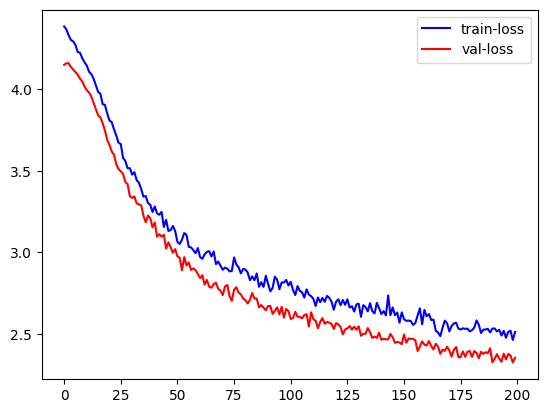

In [220]:
train_loss,val_loss=torch.tensor(history["loss"]),torch.tensor(history["val_loss"])

train_loss,val_loss=train_loss.view((200,-1)),val_loss.view((200,-1))

train_loss,val_loss=train_loss.mean(-1),val_loss.mean(-1)

plt.plot(train_loss,'b-',label="train-loss")
plt.plot(val_loss,'r-',label="val-loss")
plt.legend()

In [222]:
history=fit(model,5_000)

Train-loss:2.4771, Validation-loss:2.4156
Train-loss:2.2992, Validation-loss:2.2340
Train-loss:2.6414, Validation-loss:2.1463
Train-loss:2.2637, Validation-loss:2.2054
Train-loss:2.5683, Validation-loss:2.2565
Train-loss:2.7962, Validation-loss:2.1474
Train-loss:2.4462, Validation-loss:2.1775
Train-loss:2.3019, Validation-loss:2.1769
Train-loss:2.5777, Validation-loss:2.0071
Train-loss:2.1358, Validation-loss:2.4081


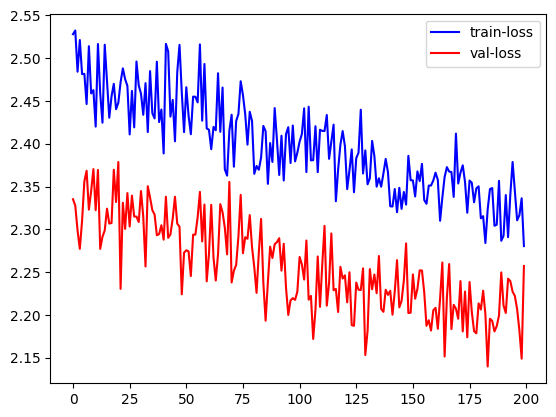

In [223]:
train_loss,val_loss=torch.tensor(history["loss"]),torch.tensor(history["val_loss"])

train_loss,val_loss=train_loss.view((200,-1)),val_loss.view((200,-1))

train_loss,val_loss=train_loss.mean(-1),val_loss.mean(-1)

plt.plot(train_loss,'b-',label="train-loss")
plt.plot(val_loss,'r-',label="val-loss")
plt.legend()

In [224]:
# After Training
print(generate(1000))

 sprst fle belk ef you
Oon soun thure wangh wigh;

LCSNOD
Bed:

AORUN:
ShD, Mo ill, amtelate court that and row
Whilt mestedse hit whermonde thame dows
Wheald
Herer fufAES:
Orie.
anouod to dencr withe watwosill now girbuxce toot of of
The hered is I angild.

KICKOAZIEISUSIET:
An sad: nostengss tonds no no pull bus thabs.

Whall a cher a lay, the rase.

SFCOCRUBANY:
The anvd et ther her cipilcZifre nous le noth
Go Plt;.
 pEN:
Yrige, me, my gom oech and donds
Hhe I cuychy rony!rromes theut a dotk, yoth ofor owoth in and Selerf
Wheven lore brorte whouveldels sen:
Nat, alime thit be with yoou, bling's crantond the e, son kot ay har is sings savend.

mORINNFE:
Dill oow sor thy of lyt ir ius dary medy of thy gand that
srouest thens hee pem.

GUDOICHENIARO:
Iull lep popinop, whoth oflard your thee hent ber, fwo to tiall hist sederee;
And by prid, incacgom!ather withd yo niss yte envat mo whr
I bn'd Iny my dor tors do 'ns.

HENGD
NIOOCCEOIO:
Bnd;, hey taie here seou ther the his rousk thorern'